Steps for times series:
1. Data Integration
2. EDA of the data
3. Processing of the Data
4. Model Building
5. Model Evalution

Data Ingestion:
1. Import the important libraries (Pandas, NumPy, Matplotlib)
2. Load the data
3. Load the time series data into the pandas data frame

In [ ]:
import pandas as pd

In [ ]:
data= pd.read_csv("TSLA.CSV")

In [ ]:
data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [ ]:
#univariate time_series
stock_data= data[['Date', 'Close']]
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [ ]:
stock_data['Date']= pd.to_datetime(stock_data['Date'])

<ipython-input-6-fc1cf50ccea6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date']= pd.to_datetime(stock_data['Date'])


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [ ]:
#to convert any column to index
stock_data.set_index("Date", inplace= True)

Why are converting data column as a index column
1. I can easily retrive the data
2. visualization is also simple
3. Those libraries has been design in such a way, it required data column as a index (scipy, statsmodel)

EDA(exploratory data analysis)
1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

In [ ]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


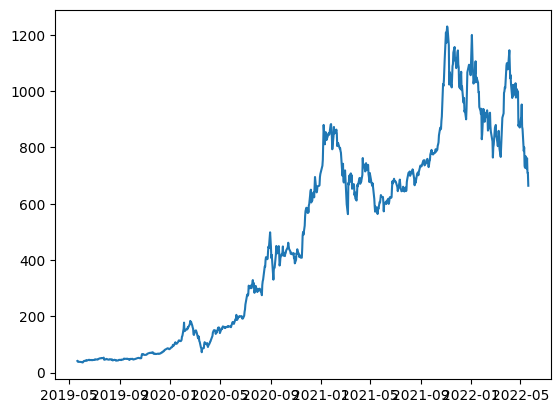

In [ ]:
import matplotlib.pyplot as plt
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

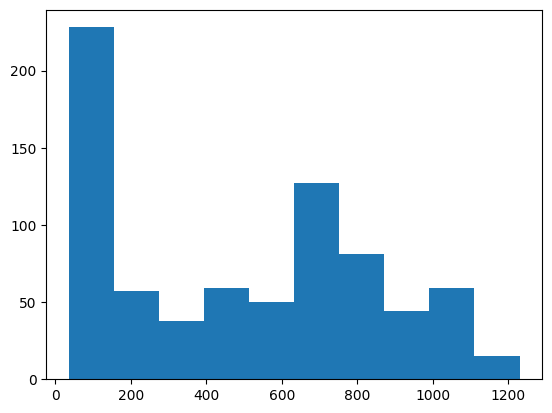

In [ ]:
plt.hist(stock_data.Close)

<ipython-input-12-e1865df5f8f5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data['Close'], kde= True)


<Axes: xlabel='Close', ylabel='Density'>

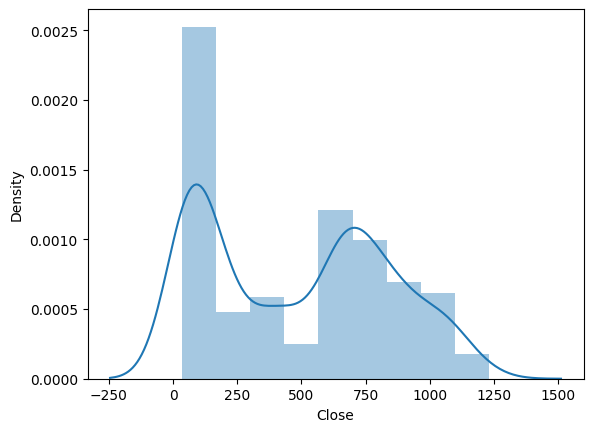

In [ ]:
import seaborn as sns
sns.distplot(stock_data['Close'], kde= True)

In [ ]:
rollMean= stock_data['Close'].rolling(12).mean()

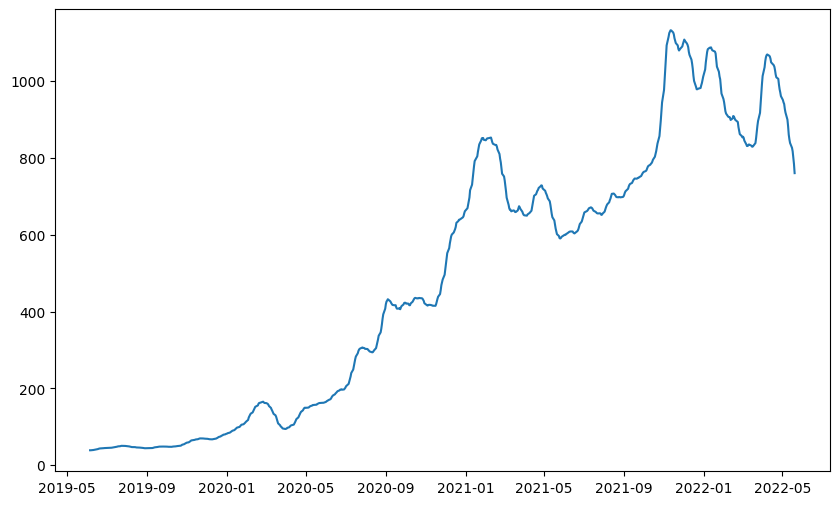

In [ ]:
plt.figure(figsize= (10,6))
plt.plot(rollMean)

In [ ]:
rollMean1= stock_data['Close'].rolling(24).mean()

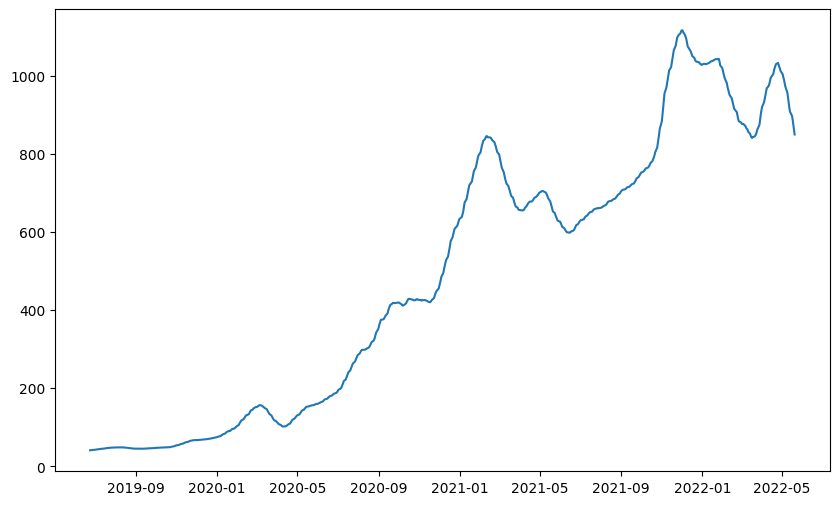

In [ ]:
plt.figure(figsize= (10,6))
plt.plot(rollMean1)

In [ ]:
rollMean2= stock_data['Close'].rolling(48).mean()

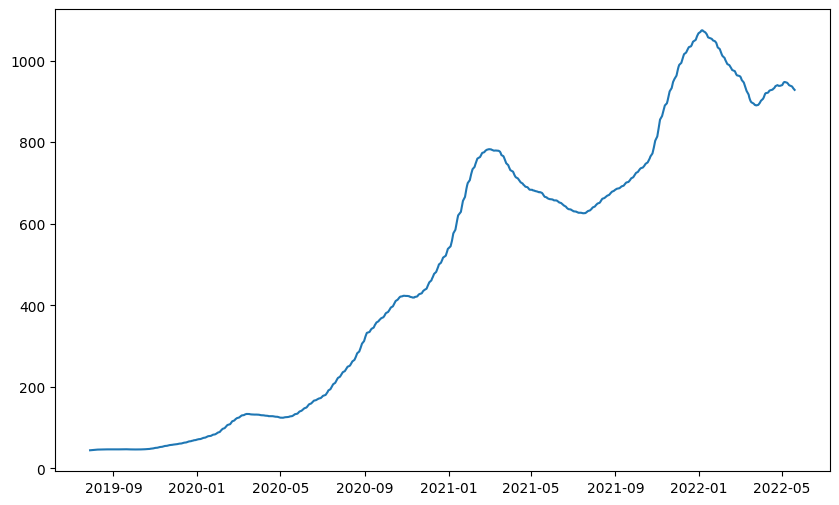

In [ ]:
plt.figure(figsize= (10,6))
plt.plot(rollMean2)

In [ ]:
rollMean0= stock_data['Close'].rolling(12).std()

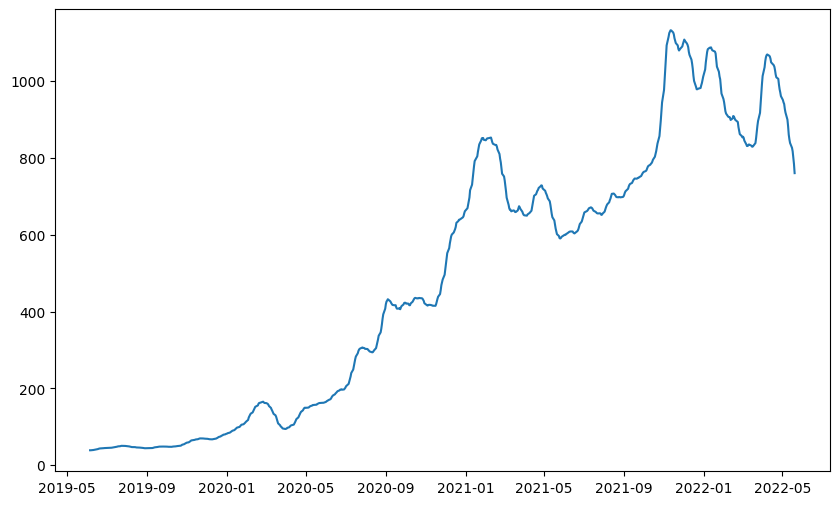

In [ ]:
plt.figure(figsize= (10,6))
plt.plot(rollMean)

In [ ]:
rollMean3= stock_data['Close'].rolling(24).std()

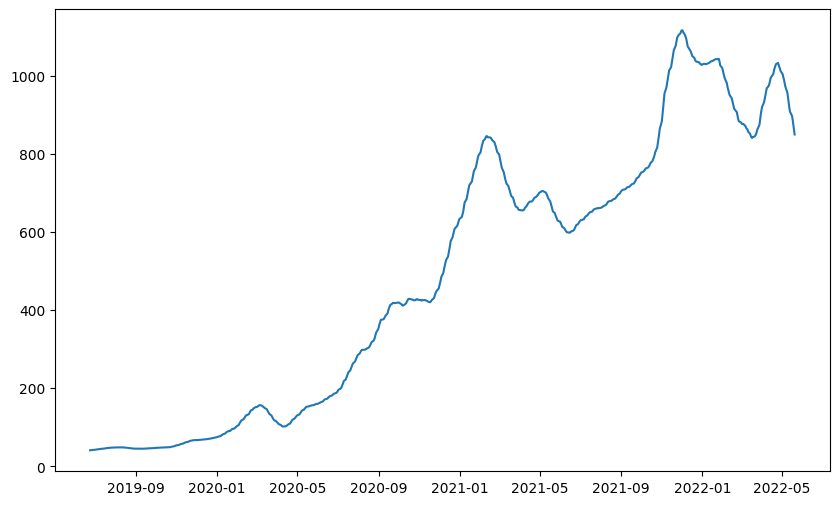

In [ ]:
plt.figure(figsize= (10,6))
plt.plot(rollMean1)

In [ ]:
rollMean4= stock_data['Close'].rolling(48).std()

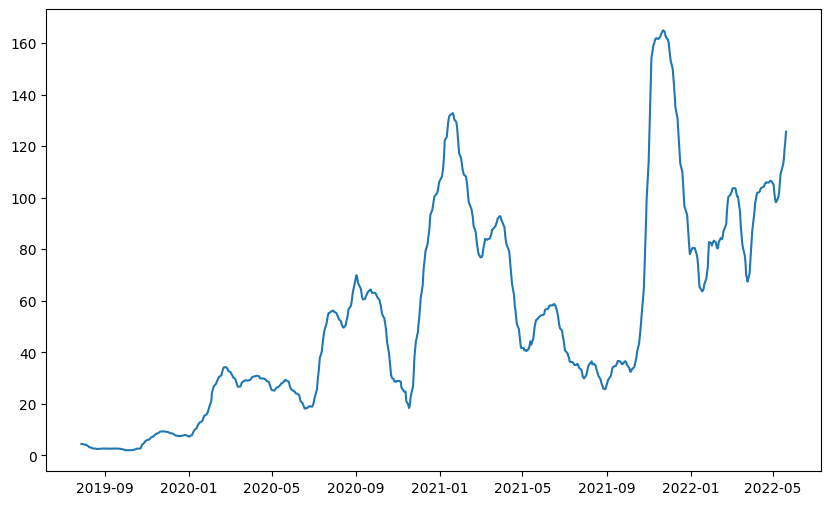

In [ ]:
plt.figure(figsize= (10,6))
plt.plot(rollMean4)

In [ ]:
def figure():
  plt.figure(figsize= (10,6))
  plt.plot(stock_data.Close, label= 'original')
  plt.plot(rollMean2, label= 'rollMean')
  plt.plot(rollMean4, label= 'rollSD')
  plt.legend()

In [ ]:
#adf (ada fuller test)
from statsmodels.tsa.stattools import adfuller
adft= adfuller(stock_data['Close'])
adft

(-1.3630085817037492,
 0.5998762543050696,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [ ]:
pd.Series(adft[0:4], index= ["test stats", "p-value", "lag", "data points"])

test stats      -1.363009
p-value          0.599876
lag              9.000000
data points    748.000000
dtype: float64

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result= seasonal_decompose(stock_data[["Close"]], period= 12)

In [ ]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

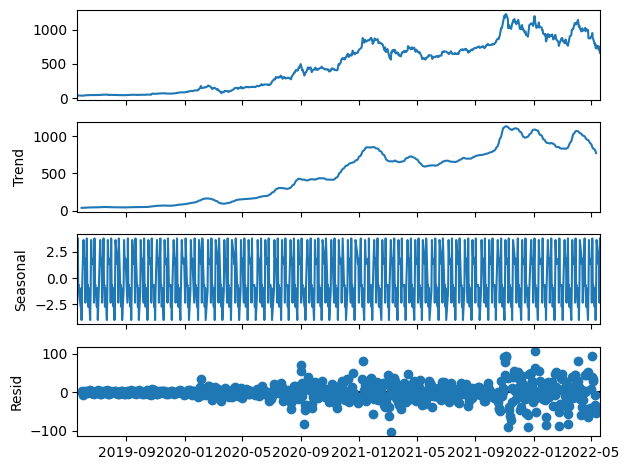

In [ ]:
fig= result.plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result1= seasonal_decompose(stock_data[["Close"]], period= 12, model= "multiplicative")

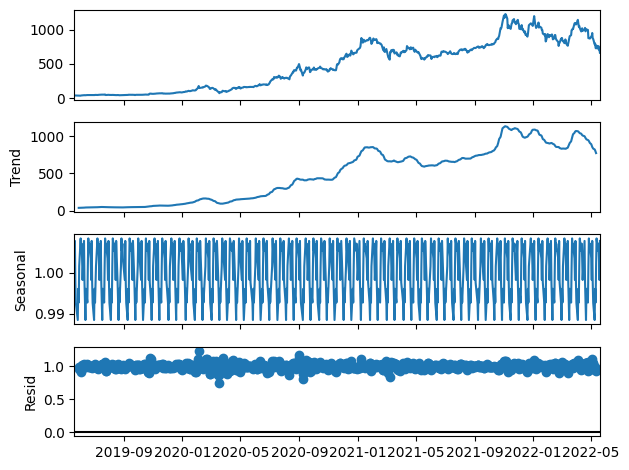

In [ ]:
r= result1.plot()

<Axes: ylabel='Close'>

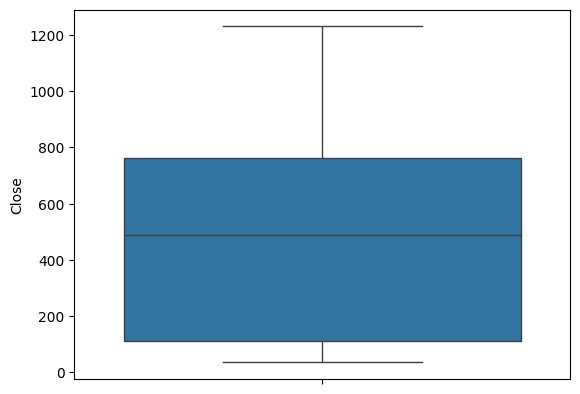

In [ ]:
sns.boxplot(stock_data.Close)

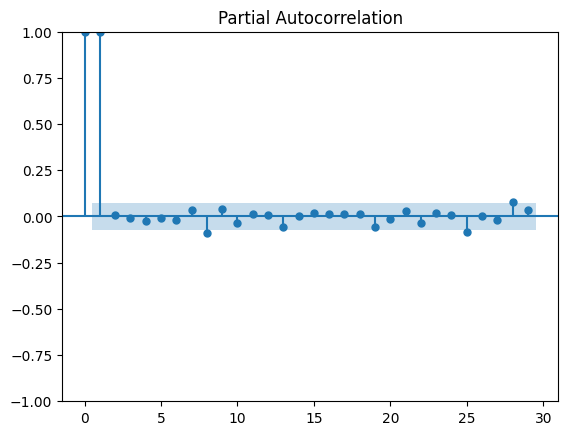

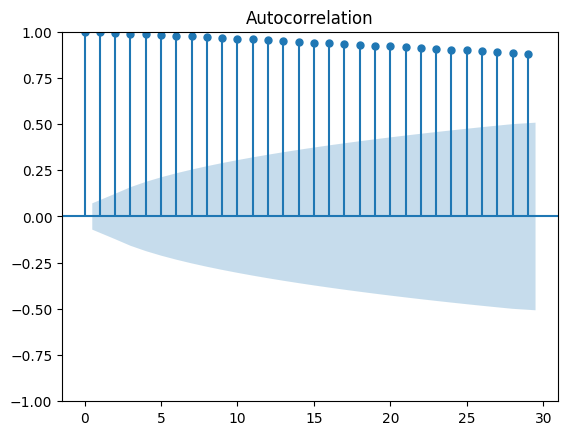

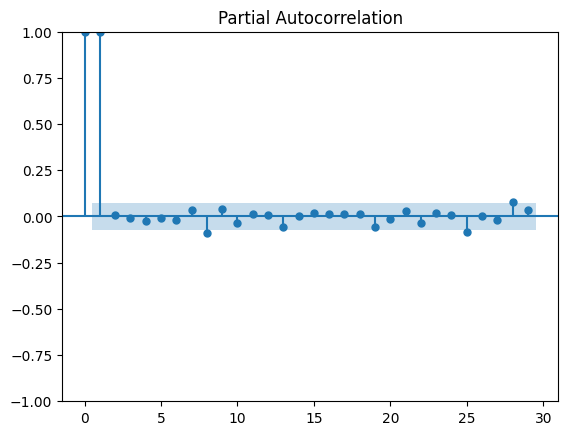

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

Preprocessing of the data
1. fill the missing value
2. convert data into stationary time series
3. if neccesary normalize
4. spilt the data into train and test
5. clean the data by removing the outlier

In [ ]:
data_close= stock_data["Close"]

In [ ]:
data_close= data_close.diff()

In [ ]:
data_close

Date
2019-05-21          NaN
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 758, dtype: float64

In [ ]:
data_close.dropna(inplace= True)
data_close

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 757, dtype: float64

In [ ]:
adft1= adfuller(data_close)
adft1

(-8.324564154012796,
 3.4987863921238255e-13,
 8,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6786.070514066748)

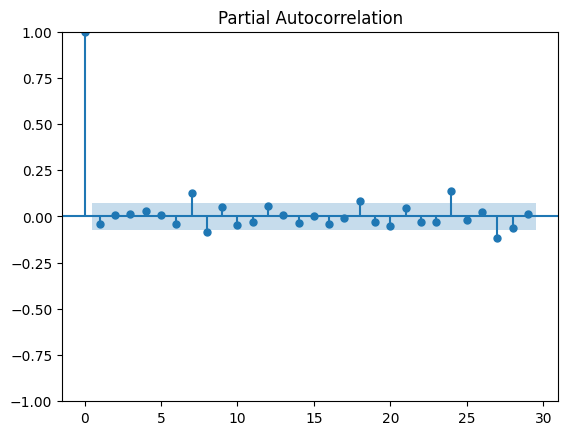

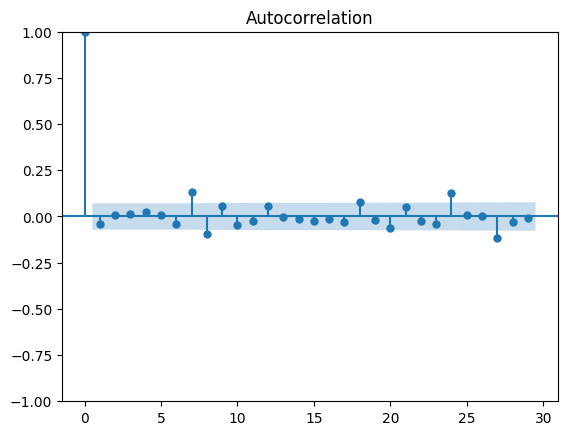

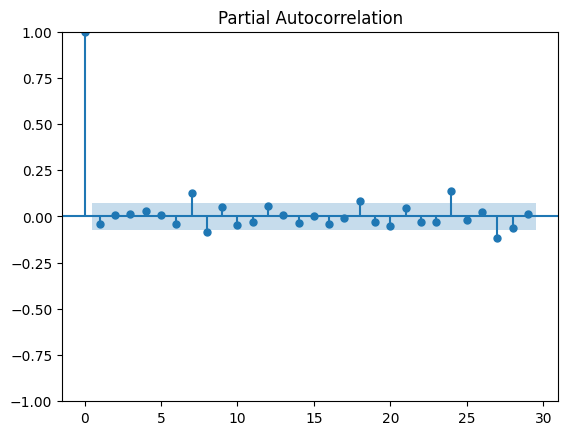

In [ ]:
plot_acf(data_close)
plot_pacf(data_close)

In [ ]:
train_data= data_close[0:-60]

In [ ]:
test_data= data_close[-60:]

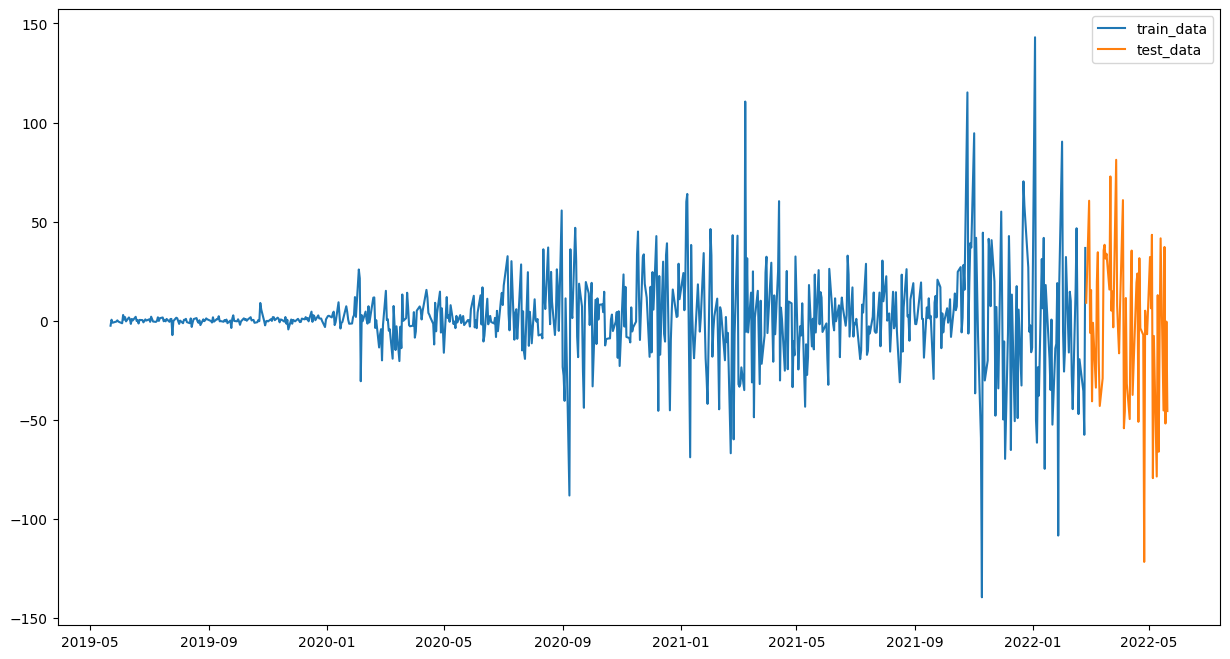

In [ ]:
plt.figure (figsize= (15,8))
plt.plot(train_data, label= 'train_data')
plt.plot(test_data, label= 'test_data')
plt.legend()

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
history= [x for x in train_data]
history

[-2.4699974060058594,
 0.5519981384277415,
 -0.9720001220703125,
 -0.385997772216804,
 0.23199844360351562,
 -0.3279991149902344,
 -0.61199951171875,
 -1.2380027770996094,
 2.9260025024414062,
 0.5979995727539062,
 1.871997833251946,
 -0.289997100830071,
 1.6759986877441406,
 0.8439979553222656,
 -1.5679969787597656,
 0.9300003051757812,
 0.20199966430664062,
 2.0219993591308594,
 -0.0579986572265625,
 0.3379974365234375,
 -1.36199951171875,
 0.4480018615722656,
 0.3559989929199219,
 -0.7760009765625,
 -0.09799957275390625,
 0.7140007019042969,
 0.12400054931640625,
 0.7419967651367259,
 -0.523998260498054,
 2.0699996948242188,
 -0.3600006103515625,
 -0.5519981384277344,
 -0.055999755859375,
 1.7719993591308665,
 -0.06399917602539773,
 1.2959976196289062,
 1.6840019226074219,
 -0.2239990234375,
 0.4959983825683594,
 -0.26399993896484375,
 0.9280014038085938,
 -0.5,
 0.8979988098144602,
 0.9420013427734304,
 -7.212001800537102,
 -0.15599822998047586,
 1.5459976196289062,
 1.298000335693

In [ ]:
model= ARIMA(history, order= (1,1,1))
model

In [ ]:
model= model.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  697
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3148.870
Date:                Mon, 22 Jan 2024   AIC                           6303.741
Time:                        16:37:27   BIC                           6317.377
Sample:                             0   HQIC                          6309.013
                                - 697                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0285      0.025     -1.150      0.250      -0.077       0.020
ma.L1         -0.9991      0.012    -81.341      0.000      -1.023      -0.975
sigma2       493.6006     12.978     38.035      0.000     468.165     519.036
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2092.37
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              31.85   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model.forecast()

array([0.04741687])

In [ ]:
test_data[0]

9.0999755859375

In [ ]:
mean_squared_error([test_data[0]], model.forecast())

81.94881931903844

In [ ]:
import numpy as np
np.sqrt(mean_squared_error([test_data[0]], model.forecast()))

9.052558716685489

In [ ]:
p_values= range(0,3)
d_values= range(0,3)
q_values= range(0,3)

In [ ]:
for i in p_values:
  for j in d_values:
    for k in q_values:
      print(i,j,k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [ ]:
train_data1= stock_data['Close'][0:60]

In [ ]:
test_data1= stock_data['Close'][-60:]

In [ ]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
      model = ARIMA(history, order=arima_order)
      model_fit = model.fit()
      yhat = model_fit.forecast()[0]
      predictions.append(yhat)
      history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [ ]:
def evaluate_models(dataset, test, p_values, d_values, q_values):
  dataset= dataset.astype('float32')
  best_score, best_clg= float('inf'), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order= (p,d,q)
        try:
          rmse= train_arima_model(dataset, test, order)
          if rmse < best_score:
            best_score, best_cfg= rmse, order
          print("ARIMA%s RMSE= %.3f" % (order,rmse))
        except:
          continue
  print("Best ARIMA%s RMSE= %.3f" % (best_cfg, best_score))


In [ ]:
import warnings
warnings.filterwarnings('ignore')
p_values= range(0,3)
d_values= range(0,3)
q_values= range(0,3)
evaluate_models(train_data1, test_data1, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE= 626.423
ARIMA(0, 0, 1) RMSE= 367.018
ARIMA(0, 0, 2) RMSE= 292.339
ARIMA(0, 1, 0) RMSE= 106.480
ARIMA(0, 1, 1) RMSE= 109.970
ARIMA(0, 1, 2) RMSE= 110.411
ARIMA(0, 2, 0) RMSE= 146.415
ARIMA(0, 2, 1) RMSE= 127.267
ARIMA(0, 2, 2) RMSE= 131.507
ARIMA(1, 0, 0) RMSE= 150.026
ARIMA(1, 0, 1) RMSE= 159.653
ARIMA(1, 0, 2) RMSE= 162.307
ARIMA(1, 1, 0) RMSE= 110.560
ARIMA(1, 1, 1) RMSE= 110.365
ARIMA(1, 1, 2) RMSE= 110.589
ARIMA(1, 2, 0) RMSE= 152.458
ARIMA(1, 2, 1) RMSE= 135.722
ARIMA(1, 2, 2) RMSE= 136.478
ARIMA(2, 0, 0) RMSE= 154.453
ARIMA(2, 0, 1) RMSE= 158.641
ARIMA(2, 0, 2) RMSE= 163.336
ARIMA(2, 1, 0) RMSE= 110.501
ARIMA(2, 1, 1) RMSE= 110.296
ARIMA(2, 1, 2) RMSE= 110.473
ARIMA(2, 2, 0) RMSE= 160.585
ARIMA(2, 2, 1) RMSE= 139.344
ARIMA(2, 2, 2) RMSE= 138.964
Best ARIMA(0, 1, 0) RMSE= 106.480


In [ ]:
history= [x for x in train_data1]
predictions= list()
for i in range(len(test_data1)):
  model= ARIMA(history, order= (2,0,0))
  model= model.fit()
  fc= model.forecast()
  predictions.append(fc)
  history.append(test_data[i])
print(f"RMSE is {np.sqrt(mean_squared_error(test_data1, predictions))}")


RMSE is 907.2286609391017


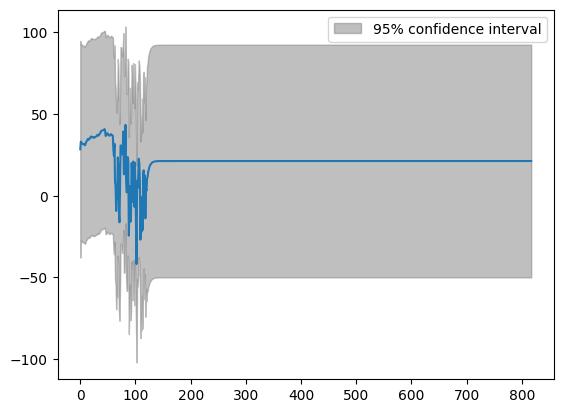

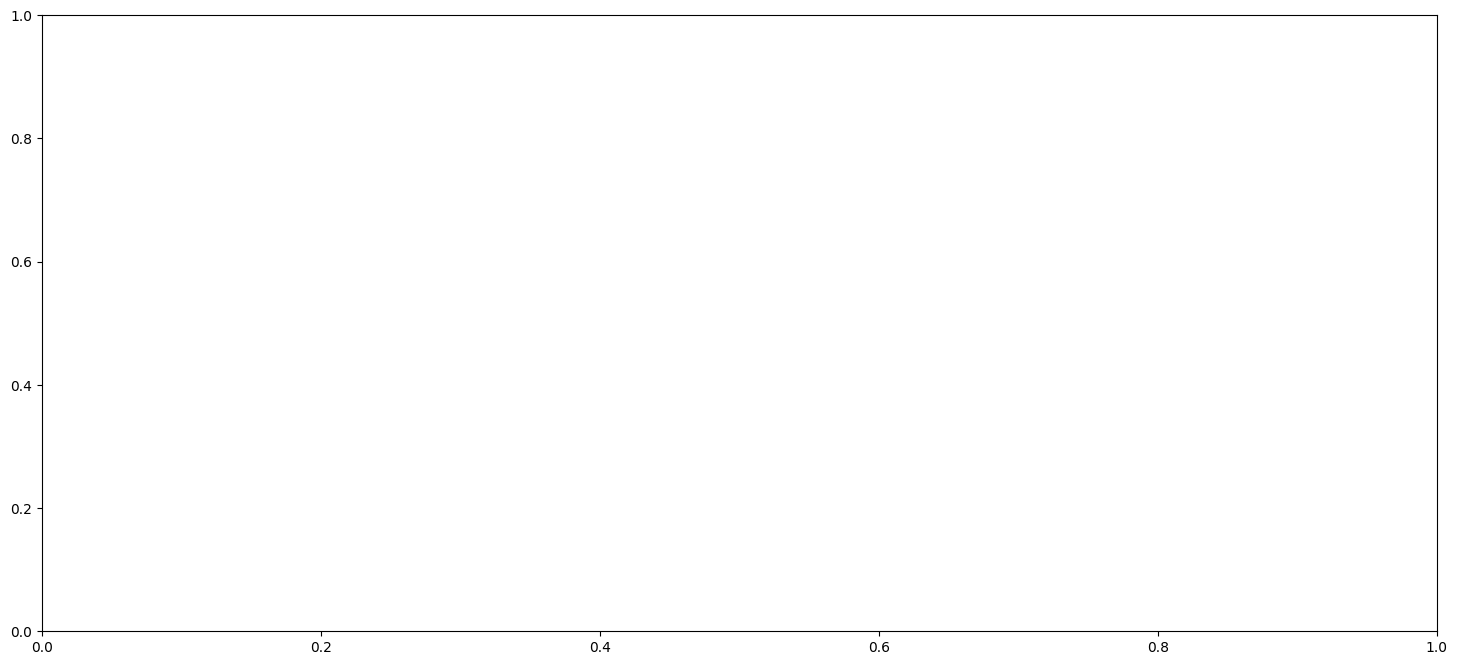

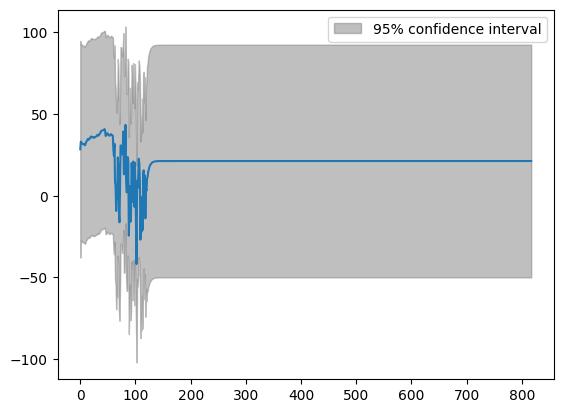

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
fig= plt.figure(figsize= (18,8))
ax1= fig.add_subplot(111)
plot_predict(result= model, start=1, end= len(stock_data['Close'])+60)